In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

In [71]:
def load_adc_data(filename):
    adc1 = []
    adc2 = []
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                try:
                    val1 = int(parts[0])
                    val2 = int(parts[1])
                    adc1.append(val1)
                    adc2.append(val2)
                except ValueError:
                    continue  # skip malformed lines
    return adc1, adc2

def plot_time(plotting_list, label=["Plot 1", "Plot 2", "Plot 3", "Plot 4", "Plot 5"], title="ADC Data Plot"):
    # Plotting
    marker_list = ['o', 'x', 's', '^', 'D']
    colors = ['b', 'r', 'g', 'c', 'm']
    plt.figure(figsize=(12, 6))
    for i, data in enumerate(plotting_list):
        plt.plot(data, label=label[i], marker=marker_list[i], color=colors[i], linestyle='-', markersize=1)
    # plt.plot(x_values, voltage_value, marker='x', linestyle='-', markersize=2, color='red')
    # plt.title("ADC Data Plot")
    plt.xlabel("Sample Number")
    plt.ylabel("Normalized ADC Value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [72]:
def MA_filter(data, window_size):
    """Apply a moving average filter to the data."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

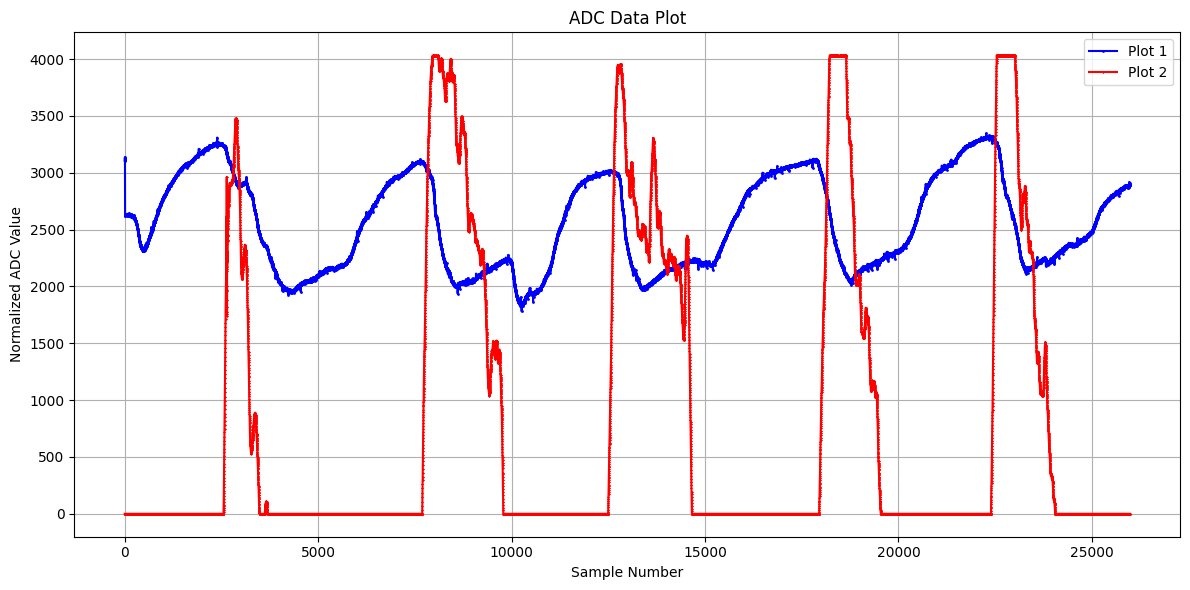

In [73]:
normal_path =  './data/normal/5/adc_normal5_2.data'
sport_path = './data/sport/10/adc_sport10_2.data'
demo_path = "./eval1.data"
adc1, adc2 = load_adc_data(normal_path)
plot_time([adc1, adc2])

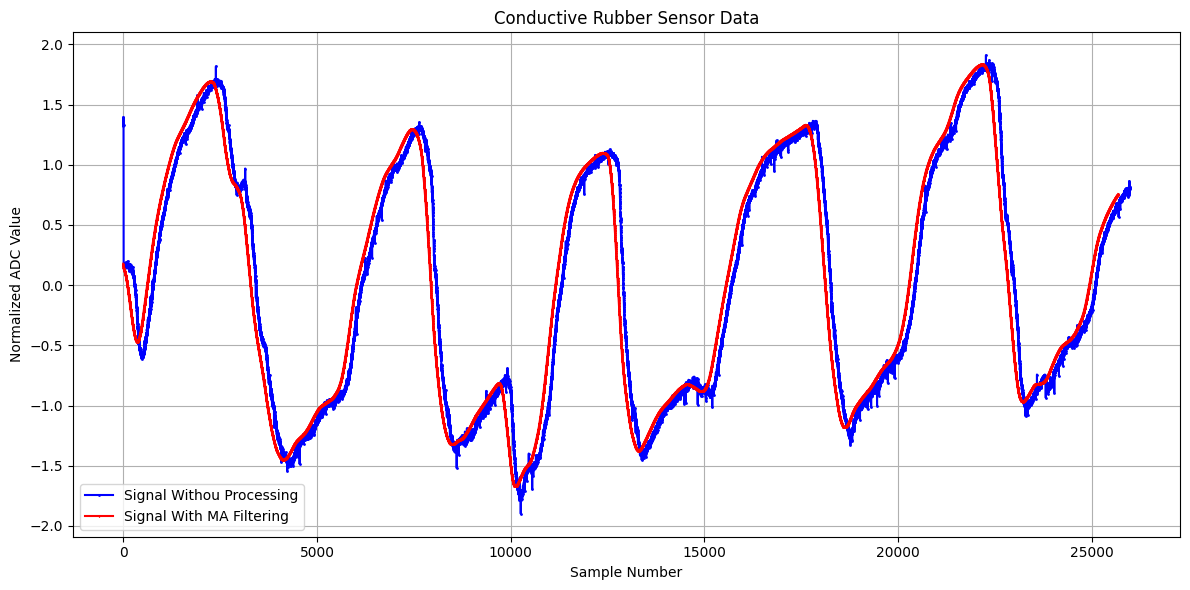

In [74]:
adc1_filtered = MA_filter(adc1, 300)
# normalize the filtered data
adc1_normalized =(adc1 - np.mean(adc1)) / np.std(adc1)
adc1_filtered_normalized = (adc1_filtered - np.mean(adc1_filtered)) / np.std(adc1_filtered)
# Plotting the filtered data
# plot_time([adc1, adc1_filtered])
plot_time([adc1_normalized, adc1_filtered_normalized], ["Signal Withou Processing", "Signal With MA Filtering"], title="Conductive Rubber Sensor Data")

Peaks found at indices: [ 2259  7450  9691 12374 17621 22169]


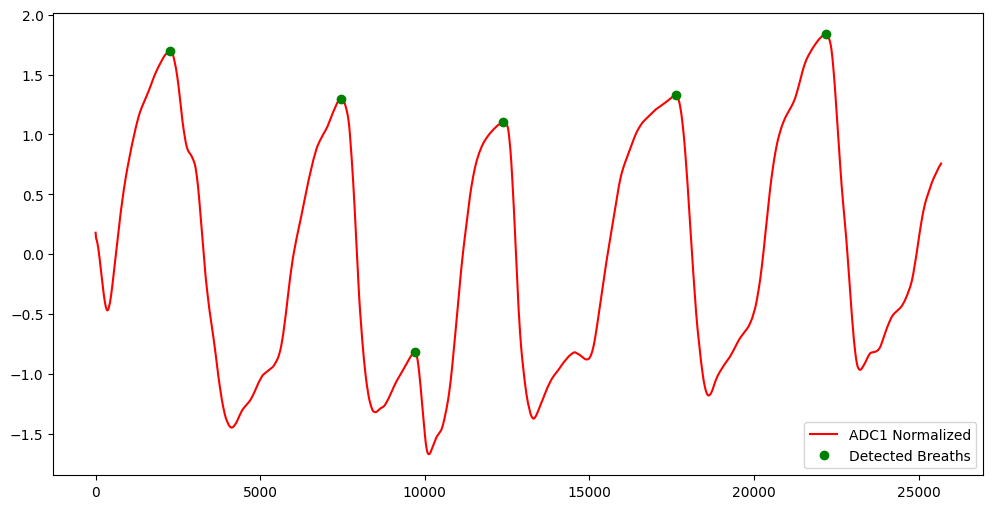

In [75]:
from scipy.signal import find_peaks
peaks_belly1, props1 = find_peaks(adc1_filtered_normalized, prominence=0.1, distance=500, plateau_size=1)
plateau_mids1 = [int((l + r) / 2) for l, r in zip(props1["left_edges"], props1["right_edges"])]
print("Peaks found at indices:", peaks_belly1)
plt.figure(figsize=(12, 6))
plt.plot(adc1_filtered_normalized, label='ADC1 Normalized', color='red')
plt.plot(plateau_mids1, adc1_filtered_normalized[plateau_mids1], 'go', label='Detected Breaths')
plt.legend()